# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [21]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)


## Low-Rank vs Diffuse Coefficient Changes

In [22]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [23]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

#S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
#S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

Sigma_lr = (W0 + DeltaW_lr) @ (W0 + DeltaW_lr).T + sigma**2 * np.eye(d)
Sigma_dense = (W0 + DeltaW_dense) @ (W0 + DeltaW_dense).T + sigma**2 * np.eye(d)

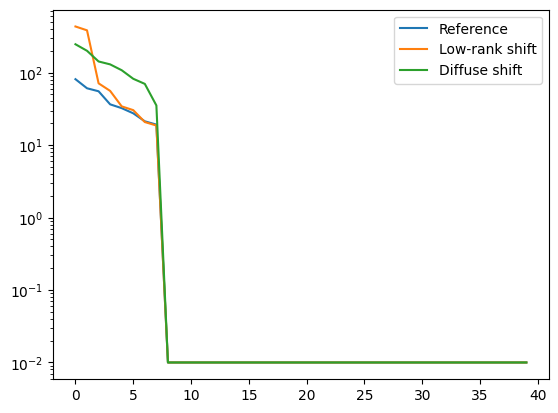

In [24]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(Sigma_lr)
eig_dense = eigvalsh(Sigma_dense)


plt.semilogy(eig0[::-1], label='Reference')
plt.semilogy(eig_lr[::-1], label='Low-rank shift')
plt.semilogy(eig_dense[::-1], label='Diffuse shift')
plt.legend()
plt.show()

In [ ]:

threshold = 0.60 
# Calculate relative differences
rel_diff_lr = np.abs(eig_lr - eig0) / eig0
rel_diff_dense = np.abs(eig_dense - eig0) / eig0

# Count significant changes
count_lr = np.sum(rel_diff_lr > threshold)
count_dense = np.sum(rel_diff_dense > threshold)

print(f"Number of significantly changed eigenvalues:")
print(f"  Low-rank case: {count_lr}")
print(f"  Diffuse case: {count_dense}")
print(f"Rank of low-rank modification: {np.linalg.matrix_rank(DeltaW_lr)}")
print(f"Rank of diffuse modification: {np.linalg.matrix_rank(DeltaW_dense)}")


Number of significantly changed eigenvalues:
  Low-rank case: 2
  Diffuse case: 8
Rank of low-rank modification: 2
Rank of diffuse modification: 8


##Interpreting these results

1. Low rank case
In the low rank case, approx. 2 eigenvalues change substantially, which directly corresponds to the rank of the coefficient modification (rank_star = 2). A rank 2 modification can only add variance along 2 independent geometric directions of variance, so only the eigenvalues associated with those 2 directions increase significantly.

2. Diffuse case 
In the diffuse case, many eigenvalues are affected because the modification has rank 8 allowing it to spread variance changes across 8 geometric directions of variance simultaneously. Even though the total magnitude equals the low-rank case, the diffuse modification distributes this change across 8 dimensions instead of concentrating it in just 2 directions. As a result, each eigenvalue shifts by a smaller amount, but all eigenvalues are affected rather than just a few.

3. These  observations demonstrate that matrix rank directly limits the number of geometric directions of variance that can be modified. A rank-2 modification constrains variance changes to only 2 orthogonal directions, which means only 2 eigenvalues can increase substantially. In contrast, a full-rank modification can alter variance in 8 geometric directions, which spreads the effect across more eigenvalues. This shows that rank determines how many independent variance directions are available for change.
